# Simple Linear Regression- Salary dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\delll\\Desktop\\Python\\DataSets\\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()
# The average experience is 5.31 year,minimum is 1.1 years and maximum is 10.5 years.
# The average salary of empoyee is 76003 Rs. ,minimum is 37731 Rs. and maximum is 122391 Rs. 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Univariate analysis

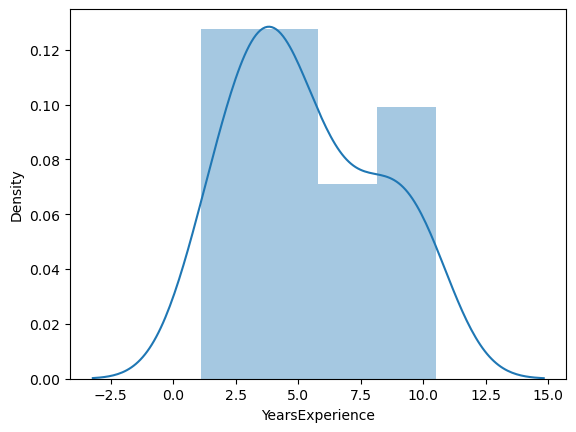

In [7]:
# draw histogram for YearsExperience
sns.distplot(df["YearsExperience"])
plt.show()
# data is right skewed

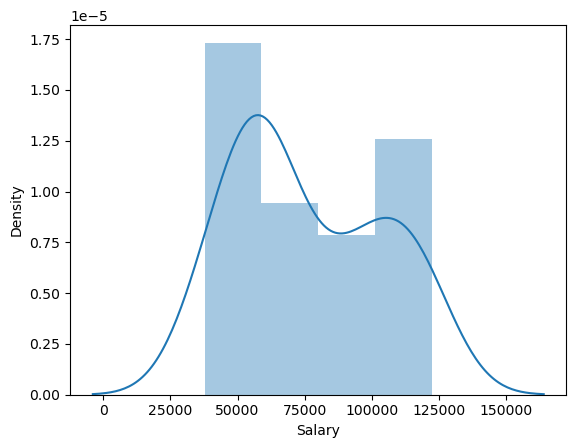

In [8]:
# draw histogram for Salary
sns.distplot(df["Salary"])
plt.show()
# data is normal bimodal.

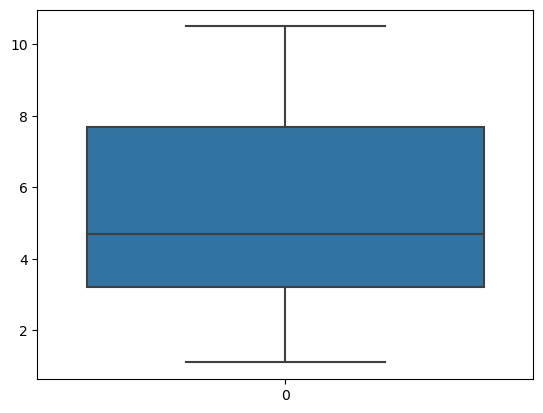

In [9]:
sns.boxplot(df["YearsExperience"])
plt.show()
# no outliers are present

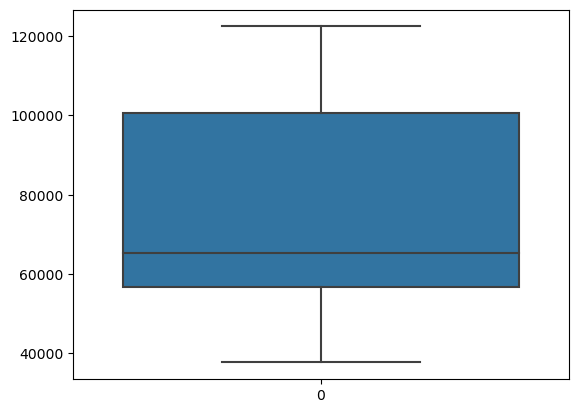

In [10]:
sns.boxplot(df["Salary"])
plt.show()
# no outliers are present

### Bivariate Analysis

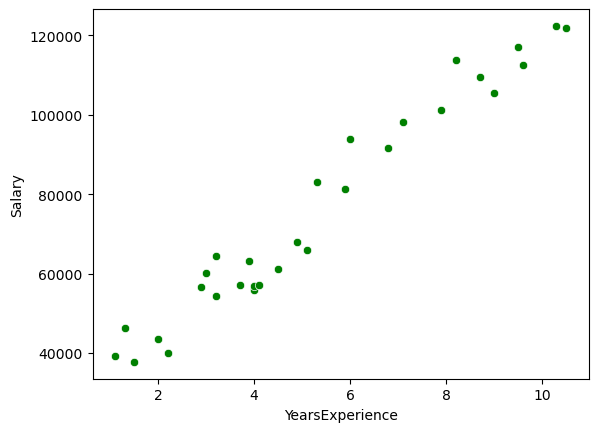

In [11]:
# draw scatter plot for YearsExperience vs Salary
sns.scatterplot(x=df["YearsExperience"],y=df["Salary"],color="g")
plt.show()
# from graph we can see that if experience  is increasing then salary is increasing.

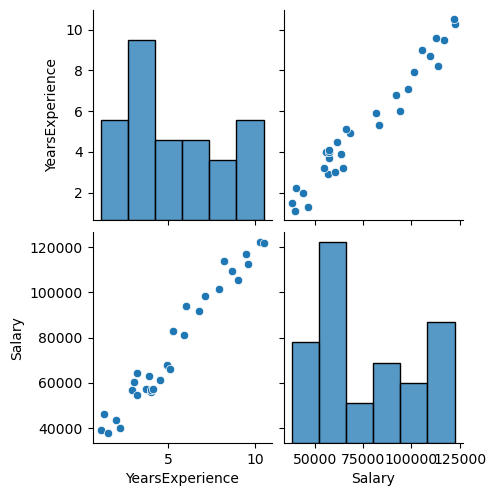

In [13]:
# draw pairplot for dataframe
sns.pairplot(df)
plt.show()

In [ ]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt="0.02f")
plt.show()
# This graph clearly shows that YearsExperience and Salary have strong positive correlation.
# Because value of correlation coeff is 0.98>0.8

### Build Model

In [17]:
x_train,x_test,y_train,y_test=train_test_split(df[["YearsExperience"]],df["Salary"],test_size=0.2)

In [1]:
x_train.shape
y_train.shape

NameError: name 'x_train' is not defined

In [19]:
x_test.shape

(6, 1)

In [20]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(x_test)

In [22]:
from sklearn.metrics import r2_score,mean_squared_error

In [23]:
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('MSE:',mse)
print('R2 score:',r2)

MSE: 21764791.942998167
R2 score: 0.9700924007950931


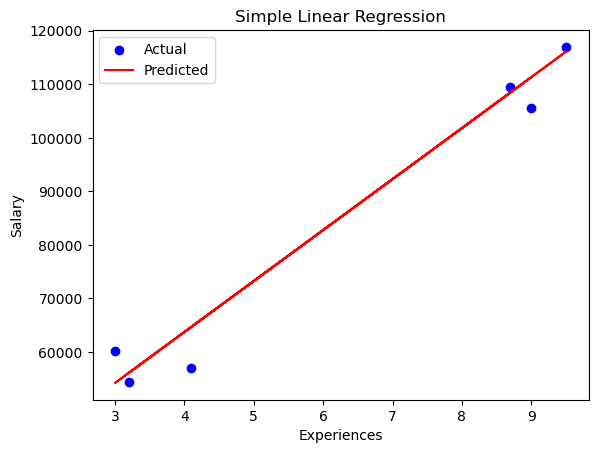

In [24]:
#Visualize the result
plt.scatter(x_test,y_test,color='b',label='Actual')
plt.plot(x_test,y_pred,color='r',label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel("Experiences")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [28]:
y_train_pred=model.predict(x_train)
y_train_pred

array([ 93244.82496502,  44721.86876464, 100856.26907488,  68507.63160796,
       117030.58780834,  81827.65880022,  39964.71619598, 125593.46243193,
        36158.99414105,  82779.08931396,  63750.4790393 ,  76119.07571783,
        53284.74338824,  46624.72979211, 123690.60140447,  62799.04852557,
        60896.1874981 ,  72313.3536629 ,  38061.85516851,  63750.4790393 ,
        74216.21469036,  56139.03492944,  90390.53342382, 103710.56061608])

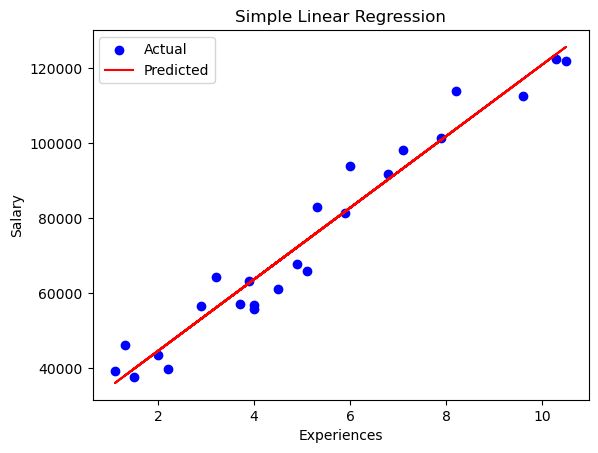

In [31]:
#Visualize the result for training data
plt.scatter(x_train,y_train,color='b',label='Actual')
plt.plot(x_train,y_train_pred,color='r',label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel("Experiences")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [32]:
# What is the salary for 11 years of experience?
salary=model.predict([[11]])
salary
# Ans : 1,30,350.62 Rs.

array([130350.6150006])

In [33]:
# What is the salary for 20 years of experience?
salary=model.predict([[20]])
salary
# Ans:2,15,979.36 Rs.

array([215979.36123655])